# Hepatitis 

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'hepatitis.data'
87hepatitis.data       100% [=============================>]   14.75K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data]
87hepatitis.data       100% [=============================>]   14.75K    --.-KB/s87[Files: 1  Bytes: 14.75K [44.56]8

7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'hepatitis.names'
87hepatitis.names      100% [=============================>]    5.71K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names]
87hepatitis.names      100% [=============================>]    5.71K    --.-KB/s87[Files: 1  Bytes: 5.71K [9.54KB]8

# Data Wrangling

In [4]:
names = ['class', 'age', 'sex', 'steroid', 'antivirals',
         'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm',
         'spleen palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
         'alk phosphate', 'sgot', 'albumin', 'protime', 'histology']

In [5]:
data = pd.read_csv("hepatitis.data", sep=",", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1)\
Replace "?"(missing value) with NaN and convert from object type to numeric type

In [7]:
for att in data.columns:
    data[att].replace('?', np.nan, inplace=True)
    data[att] = pd.to_numeric(data[att])

for att in ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'histology', 'class']:
    data[att].replace((1, 2), (0, 1), inplace=True)

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("hepatitis_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read_csv("hepatitis_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)


In [11]:
ep.ad.feature_type_overview(edata)

! Features 'class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'histology' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 155 obs and 20 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ age
║   ╠══ albumin
║   ╠══ alk phosphate
║   ╠══ bilirubin
║   ╠══ protime
║   ╚══ sgot
╚══ 🗂️ Categorical features
    ╠══ anorexia (2 categories)
    ╠══ antivirals (2 categories)
    ╠══ ascites (2 categories)
    ╠══ class (2 categories)
    ╠══ fatigue (2 categories)
    ╠══ histology (2 categories)
    ╠══ liver big (2 categories)
    ╠══ liver firm (2 categories)
    ╠══ malaise (2 categories)
    ╠══ sex (2 categories)
    ╠══ spiders (2 categories)
    ╠══ spleen palpable (2 categories)
    ╠══ steroid (2 categories)
    ╚══ varices (2 categories)

Output()

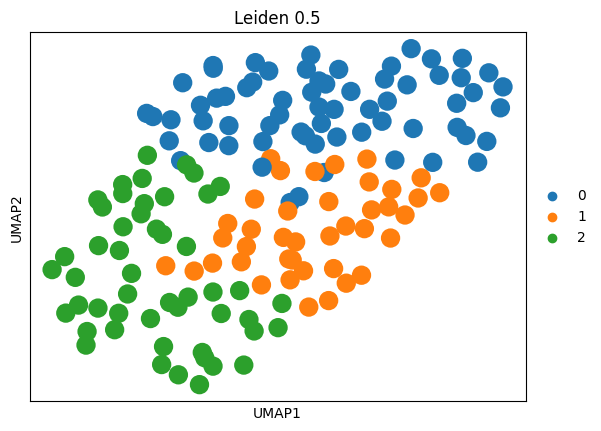

In [12]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

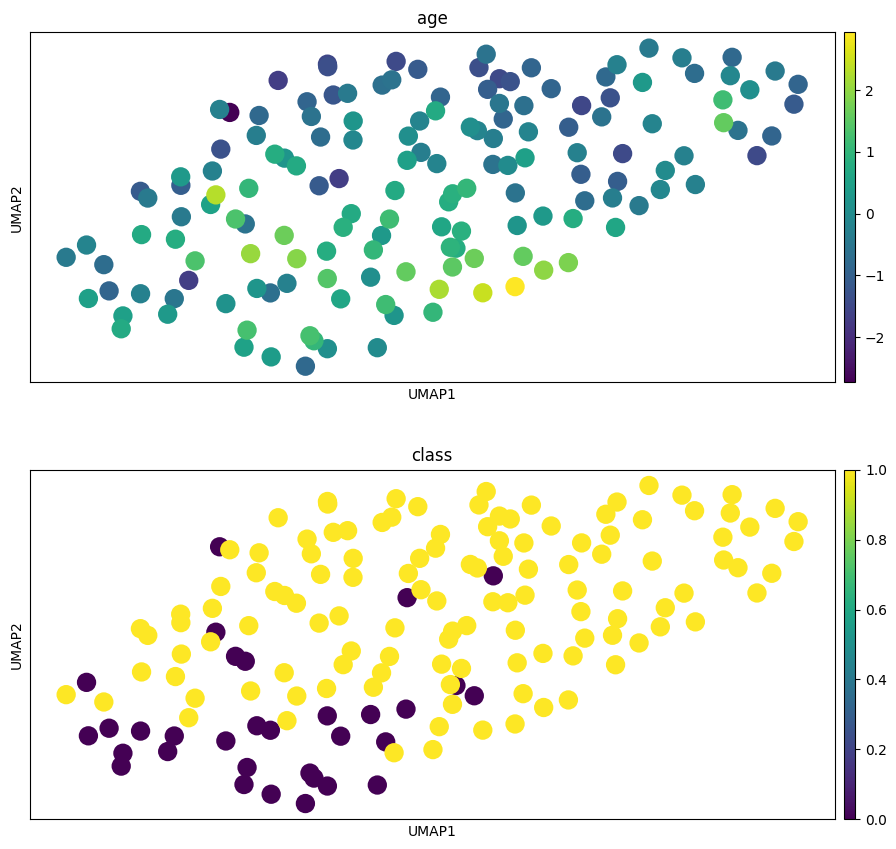

In [13]:
ep.pl.umap(edata
, color=["age", "class"], ncols=1, wspace=0.75)